In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
data_dir = 'datasets/Предобработанные снимки по классам/'
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       validation_split=0.2,
                                                       subset="training",
                                                       color_mode='rgb',
                                                       seed=123,
                                                       image_size=(256, 256),
                                                       batch_size=128)
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                     validation_split=0.2,
                                                     subset="validation",
                                                     color_mode='rgb',
                                                     seed=123,
                                                     image_size=(256, 256),
                                                     batch_size=128)

Found 48 files belonging to 4 classes.
Using 39 files for training.
Found 48 files belonging to 4 classes.
Using 9 files for validation.


In [3]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3']


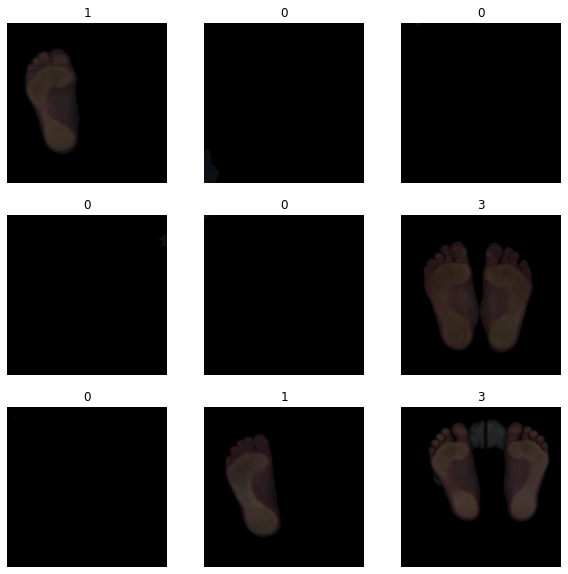

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
num_classes = 4

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [6]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
history = model.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 1.3821 - accuracy: 0.2051 - val_loss: 1.3267 - val_accuracy: 0.1111
Epoch 2/30
1/1 [==============================] - 0s 111ms/step - loss: 1.2155 - accuracy: 0.1795 - val_loss: 1.1583 - val_accuracy: 0.1111
Epoch 3/30
1/1 [==============================] - 0s 113ms/step - loss: 1.0311 - accuracy: 0.3333 - val_loss: 0.9479 - val_accuracy: 0.7778
Epoch 4/30
1/1 [==============================] - 0s 111ms/step - loss: 0.8774 - accuracy: 1.0000 - val_loss: 0.7151 - val_accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 111ms/step - loss: 0.7462 - accuracy: 1.0000 - val_loss: 0.5827 - val_accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 114ms/step - loss: 0.6529 - accuracy: 1.0000 - val_loss: 0.4960 - val_accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 117ms/step - loss: 0.5593 - accuracy: 1.0000 - val_loss: 0.3801 - val_accuracy: 1.0000
Epoch 8/30
1/1 [=======

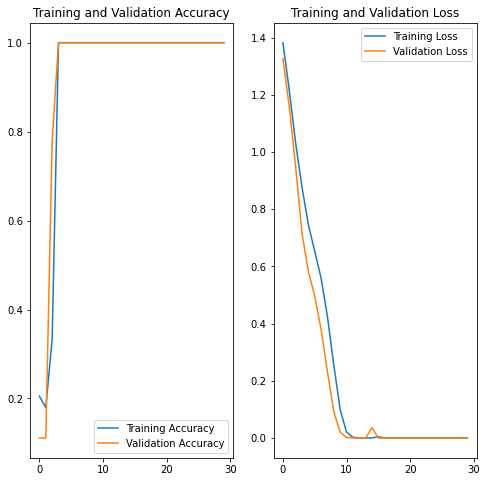

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = list(range(30))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets
